In [50]:
import pandas as pd
import numpy as np
# Initialization
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
nltk.download('wordnet')
nltk.download('omw-1.4')
from cleanup_functions import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from nltk.stem.wordnet import WordNetLemmatizer
WNlemma = nltk.WordNetLemmatizer()
stemmer = nltk.PorterStemmer()
from nltk.tokenize import TweetTokenizer
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../modeling')
from toolbox import fit_nlp, nlp_preprocess, cross_validation_score


[nltk_data] Downloading package wordnet to /Users/kw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [51]:
# data
INPUT_NAME='train_wikipedia'
#INPUT_NAME='train_civil'

df=pd.read_csv("../data/"+INPUT_NAME+ ".csv")
df = df.reset_index(drop=True)

Get list of toxic words

In [52]:
#X = train.loc[train['toxic'] == 1, 'comment_text'] 
X = df['comment_text'] 
Y = df['toxic']

In [57]:
#########################################
# set parameters
#########################################
min_df = 20 # 1 20
stop_words = 'english' # {} 'english'
ngram = 1 # 1, 2
lowercase = True # True, False
tokenizer = tweettokenizer
vectorizer = CountVectorizer # TfidfVectorizer CountVectorizer
word_generalization = WNlemma.lemmatize # stemmer.stem WNlemma.lemmatize

#########################################
# preprocess and fit models
#########################################

from toolbox import nlp_preprocess
# preprocess
print('Vectorizing and Tokenizing...')
analyzer = vectorizer().build_analyzer()
def change_word(doc):
    return (word_generalization(t) for t in analyzer(doc))
vect = vectorizer(analyzer=change_word, tokenizer=tokenizer, min_df=min_df, 
                        ngram_range=(1,ngram), stop_words=stop_words, 
                        lowercase=lowercase)
X_vect = vect.fit_transform(X)
print('Done!')


Vectorizing and Tokenizing...
Done!


In [58]:
X_vect.shape

(223549, 16191)

In [59]:
len(vect.vocabulary_)


16191

In [60]:
# Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1500)
model.fit(X_vect, Y)


LogisticRegression(max_iter=1500)

In [61]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model (from lowest to highest values)
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1]
# so the list returned is in order of largest to smallest
print("Largest Coefs: \n{}".format(feature_names[sorted_coef_index[:-300:-1]]))

Largest Coefs: 
['motherfucker' 'fuck' 'fucker' 'fucked' 'idiot' 'asshole' 'fucktard'
 'faggot' 'nigger' 'cocksucker' 'stupid' 'fuk' 'fucking' 'shit' 'goddamn'
 'stupidest' 'nigga' 'bitch' 'dickhead' 'suck' 'bullshit' 'fuckhead'
 'bastard' 'cunt' 'masturbate' 'dumbass' 'idiotic' 'douchebag' 'jerk' 'as'
 'moron' 'dick' 'cking' 'pussy' 'jackass' 'penis' 'arsehole' 'stupidity'
 'arse' 'dumbest' 'slut' 'fuckwit' 'dipshit' 'fagot' 'motherfucking'
 'whore' 'vagina' 'fuckin' 'hypocrite' 'shut' 'semen' 'chink' 'ck'
 'compounded' 'retard' 'kerry' 'zebedee' 'moronic' 'shove' 'fuc' 'shite'
 'stupidly' 'drove' 'shitty' 'wanker' 'dammit' 'foolish' 'crap' 'nipple'
 'impersonal' 'retarded' 'masturbating' 'fatty' 'squeeze' 'ybm' 'dame'
 'loser' 'damn' 'fagget' 'blowjob' 'tit' 'looser' 'fag' 'nerd' 'scum'
 'shithead' 'cock' 'scumbag' 'donkey' 'murdering' 'cum' 'homosexual'
 'imbecile' 'absurdity' 'vomit' 'bloody' 'pedophile' 'prostitute' 'kill'
 'brainwashing' 'riddance' 'hell' 'teaming' 'pest' 'idiocy

In [62]:
toxic_words_raw = feature_names[sorted_coef_index[:-300:-1]]

In [63]:
# how to get index in df with specific word
X_array = X_vect.toarray()


In [60]:
X_array.shape

(223542, 19098)

In [61]:
# transpose X_array
df_occurrence = pd.DataFrame(data=X_array,columns = X_vect.get_feature_names_out())
df_occurrence

,00,001,004,007,01,02,03,04,05,06,...,zone,zoo,zoological,zoom,zora,zoroastrian,zu,zulu,zurich,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
words_in_corpus = lemm_vectorizer.get_feature_names_out()
words_in_corpus

array(['00', '000', '000000', ..., '見学', '迷惑', '連絡'], dtype=object)

In [48]:
#toxic_words = toxic_words[[curse_word in words_in_corpus for curse_word in toxic_words]]
toxic_words = ['bitch', 'fuck', 'shit', 'piss', 'dick', 'motherfucker', 'ass', 
'asshole', 'bastard', 'damn', 'cunt', 'faggot', 'slut', 'whore']
# not in: 'meathead','douche-bag'
#toxic_words[

toxic_index = [i for i, curse_word in enumerate(toxic_words) if curse_word in words_in_corpus]
toxic_words = [toxic_words[i] for i in toxic_index]
toxic_words

['bitch',
 'fuck',
 'shit',
 'piss',
 'dick',
 'motherfucker',
 'ass',
 'asshole',
 'bastard',
 'damn',
 'cunt',
 'faggot',
 'slut',
 'whore']

In [63]:
# check if toxic words are in 
[curse_word in words_in_corpus for curse_word in toxic_words]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [65]:
df_occurrence['bitch'] + df_occurrence['slut'] 

0         0
1         0
2         0
3         0
4         0
         ..
223537    0
223538    0
223539    0
223540    1
223541    0
Length: 223542, dtype: int64

In [67]:
index_toxic = sum(df_occurrence[insult] for insult in toxic_words) > 0

In [68]:
df['toxic_baseline'] = index_toxic

In [69]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'toxic_baseline'],
      dtype='object')

In [71]:
import matplotlib.pyplot as plt
# important functions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

def print_evaluations(y,predictions):
    print(f"Accuracy: {accuracy_score(y, predictions)}")
    print(f"Precision: {precision_score(y, predictions)}")
    print(f"Recall: {recall_score(y, predictions)}")
    print(f"F1: {f1_score(y, predictions)}")

In [75]:
print_evaluations(df['toxic'],df['toxic_baseline'])

Accuracy: 0.927530396972381
Precision: 0.7485615650172612
Recall: 0.36503928170594835
F1: 0.4907582044511504


Confusion matrix, without normalization
[[199536   2622]
 [ 13578   7806]]


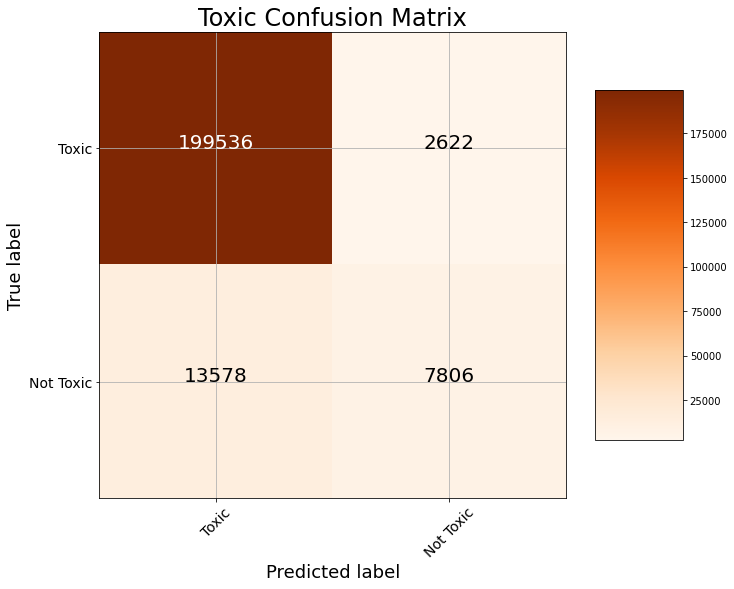

In [77]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(df['toxic'],df['toxic_baseline'])

plot_confusion_matrix(cm, classes = ['Toxic', 'Not Toxic'],
                      title = 'Toxic Confusion Matrix')

In [49]:
#%%
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
# Initialization
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

import mlflow
WNlemma = nltk.WordNetLemmatizer()


def __get_data():
    #logger.info("Getting the data")
    #########################################
    # import data
    #########################################
    DATA_NAME = 'train_wikipedia_pre_clean'
    train = pd.read_csv("../data/" + DATA_NAME + ".csv")

    # cleaning data and preparing
    Y = train["toxic"][:100000]
    X = train["comment_text"][:100000]
    return X,Y, DATA_NAME



X, Y,DATA_NAME = __get_data()





analyzer = CountVectorizer().build_analyzer()
def lemmatize_word(doc):
    return (WNlemma.lemmatize(t) for t in analyzer(doc))

lemm_vectorizer = CountVectorizer(min_df=15, analyzer=lemmatize_word)
X_vect = lemm_vectorizer.fit_transform(X)
lenvoc =  len(lemm_vectorizer.vocabulary_)


# get toxic words

model = LogisticRegression(max_iter=1500)
model.fit(X_vect, Y)
# get the feature names as numpy array
feature_names = np.array(lemm_vectorizer.get_feature_names_out())
# Sort the coefficients from the model (from lowest to highest values)
sorted_coef_index = model.coef_[0].argsort()
toxic_words_raw = feature_names[sorted_coef_index[:-300:-1]]


[nltk_data] Downloading package wordnet to /Users/kw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/kw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [49]:

X_array = X_vect.toarray()
df_occurrence = pd.DataFrame(data=X_array,columns = lemm_vectorizer.get_feature_names_out())
    
#words_in_corpus = lemm_vectorizer.get_feature_names_out()
## only keep those words that are in corpus
#toxic_index = [i for i, curse_word in enumerate(toxic_words) if curse_word in words_in_corpus]
#toxic_words = [toxic_words[i] for i in toxic_index]

#logger.info('Calculating Score')
pred = sum(df_occurrence[insult] for insult in toxic_words_raw) > 0
eval = roc_auc_score(Y, pred)






NameError: name 'lemm_vectorizer' is not defined

In [48]:
df['pred'] = pred

NameError: name 'pred' is not defined

In [60]:
df['pred'] == 1 & df['toxic'] == 0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [47]:
#falsealarm_baseline = 
df.query("pred or toxic")

#df.loc[(df['pred'] == 1& df['toxic'] == 0), 'comment_text']
#falsealarm_baseline.to_csv('falsealarm_baseline.csv')
#misses_baseline = df.loc[(df['pred'] == 0 & df['toxic'] == 1), 'comment_text']
#misses_baseline.to_csv('misses_baseline.csv')

UndefinedVariableError: name 'pred' is not defined